## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,False


In [13]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH'] / 365
app_train['YEARS_BIRTH_equal_width_grp'] = pd.cut(app_train['YEARS_BIRTH'], 5)
app_train['YEARS_BIRTH_equal_width_grp'].value_counts()

(30.238, 39.959]    80188
(39.959, 49.679]    74661
(49.679, 59.4]      66194
(20.469, 30.238]    46806
(59.4, 69.121]      39662
Name: YEARS_BIRTH_equal_width_grp, dtype: int64

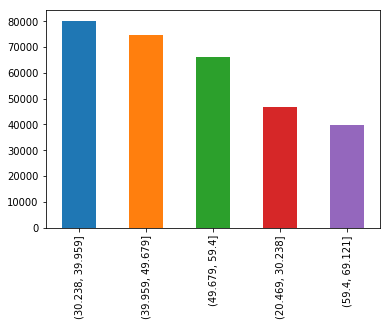

In [14]:
app_train['YEARS_BIRTH_equal_width_grp'].value_counts().plot(kind='bar')

In [15]:
app_train['YEARS_BIRTH_freq_width_grp'] = pd.qcut(app_train['YEARS_BIRTH'], 5)
app_train['YEARS_BIRTH_freq_width_grp'].value_counts()

(20.517, 32.038]    61512
(39.496, 47.178]    61509
(32.038, 39.496]    61504
(56.093, 69.121]    61495
(47.178, 56.093]    61491
Name: YEARS_BIRTH_freq_width_grp, dtype: int64

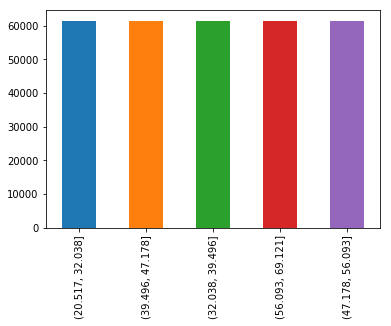

In [16]:
app_train['YEARS_BIRTH_freq_width_grp'].value_counts().plot(kind='bar')

In [20]:
bins =  [-np.inf, 35, 50, 65, np.inf]
app_train['YEARS_BIRTH_custom_grp'] = pd.cut(app_train['YEARS_BIRTH'], bins)
app_train['YEARS_BIRTH_custom_grp'].value_counts()

(35.0, 50.0]    119409
(50.0, 65.0]     95538
(-inf, 35.0]     84461
(65.0, inf]       8103
Name: YEARS_BIRTH_custom_grp, dtype: int64

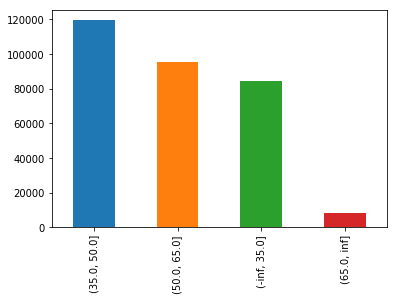

In [21]:
app_train['YEARS_BIRTH_custom_grp'].value_counts().plot(kind='bar')